## Imports and etc:

In [1]:
import os
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/sam/All-Program/App/deep-reinforcement-learning/')

from DeepRL import commons as cmn

%matplotlib inline

## Plot Module

In [2]:
def plot(scores, loss, td_error):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35,8))
    ax = ax.ravel()
    ax[0].plot(scores)
    ax[0].set_title('scores')
    ax[1].plot(loss)
    ax[1].set_title('loss')
    ax[2].plot(td_error)
    ax[2].set_title('td_error')
    plt.plot()

## Model 1:
----------

In [3]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_1'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 1.01
Episode 200	Average Score: 3.73
Episode 300	Average Score: 7.62
Episode 400	Average Score: 10.37
Episode 488	Average Score: 12.94
Environment solved in 489 episodes!	Average Score: 13.01


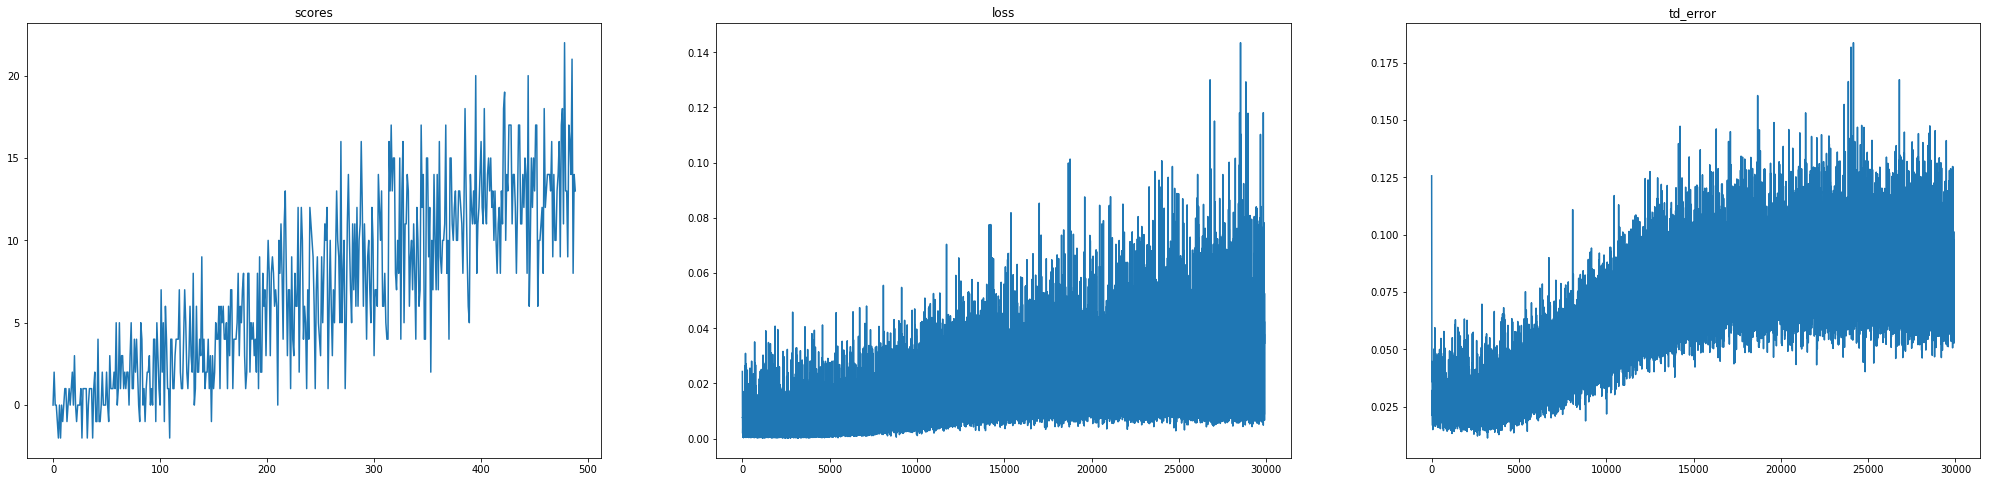

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

### Model 2:

* Batch size = 64
* TAU = 0.05

##### TO Note:
* Would Initialing Tau with a higher value and decreasing slowly till a certain point help in learning.

In [3]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_2'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 700
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.05  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
        
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 0.61
Episode 200	Average Score: 2.76
Episode 300	Average Score: 6.43
Episode 400	Average Score: 8.18
Episode 500	Average Score: 10.87
Episode 600	Average Score: 12.14
Episode 681	Average Score: 12.97
Environment solved in 682 episodes!	Average Score: 13.00


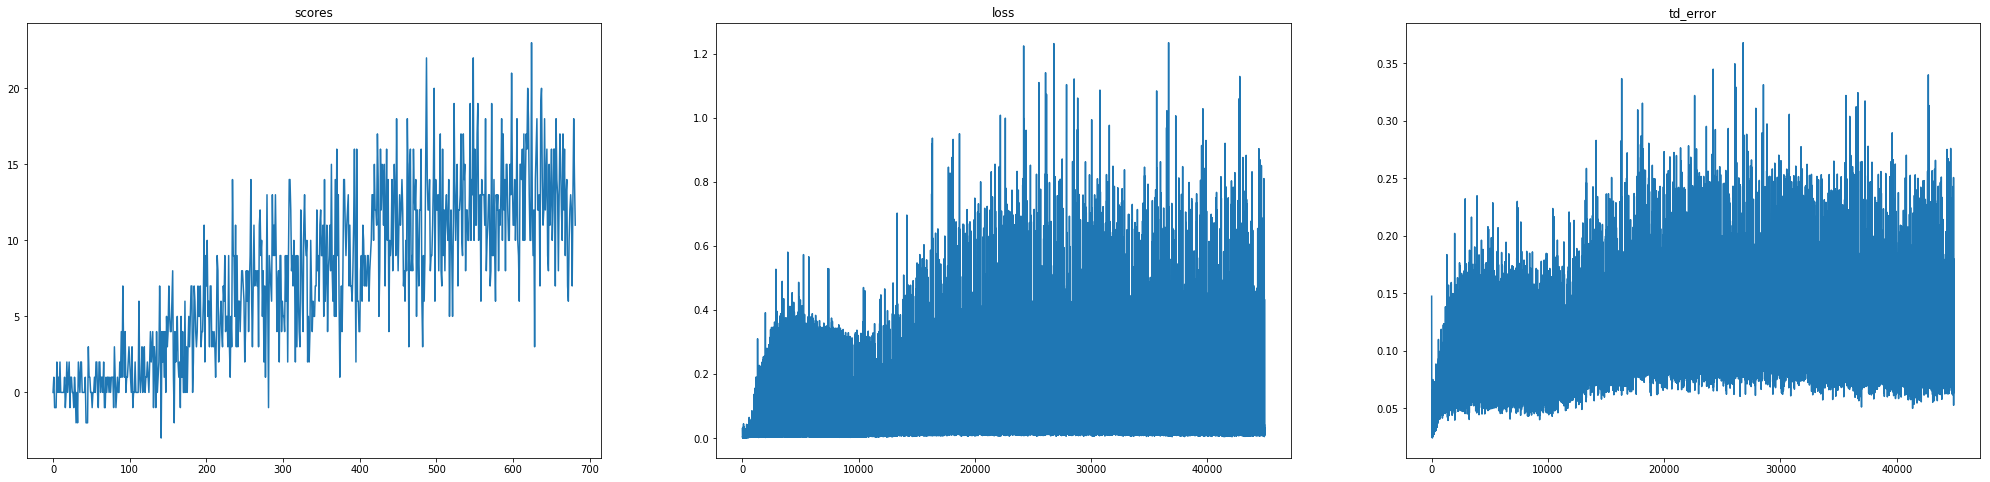

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

### Model 3:

* TAU = 0.1

In [4]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_3'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.1  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 0.57
Episode 200	Average Score: 3.67
Episode 300	Average Score: 5.70
Episode 400	Average Score: 8.00
Episode 500	Average Score: 9.79
Episode 600	Average Score: 11.28
Episode 700	Average Score: 12.67


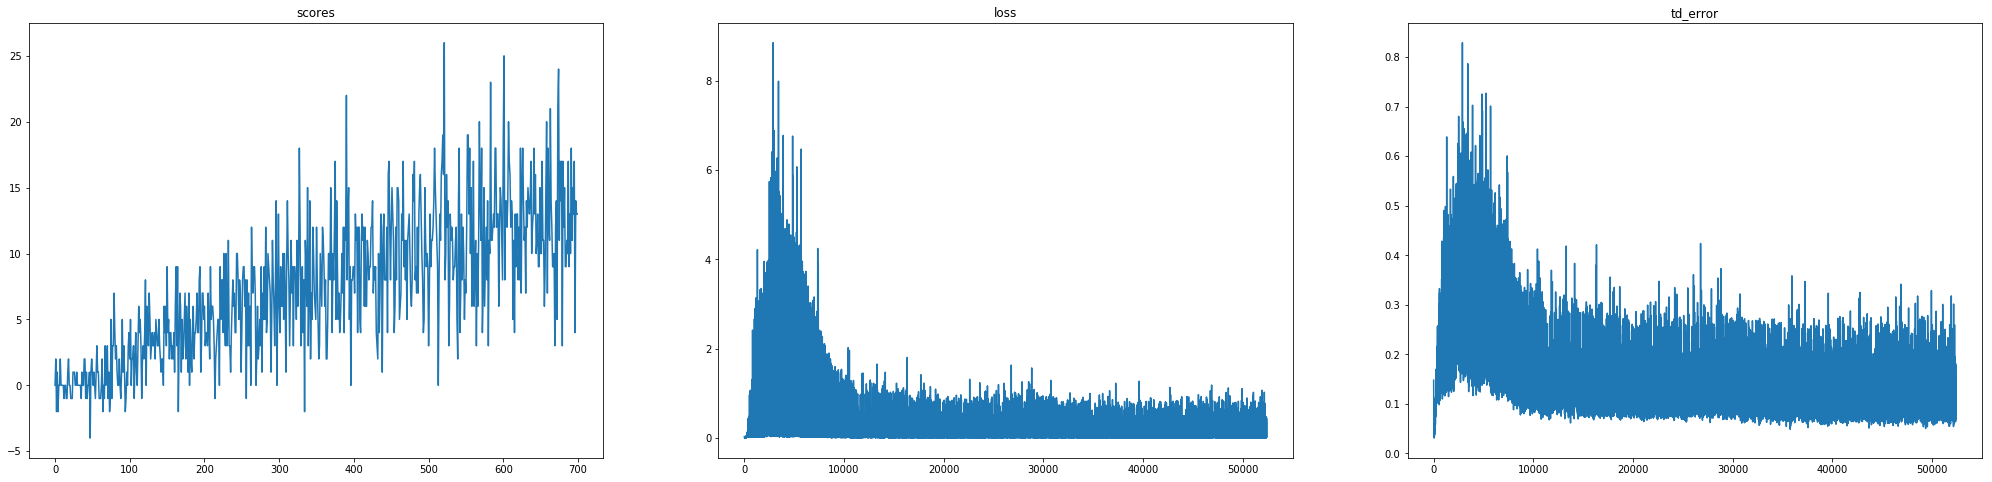

In [5]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

### Model 4:

* TAU = 0.3

* Sign of Overfitting

In [3]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_4'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.3  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net2'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net2) .... .... ....
[INIT] Initializing Network (net2) .... .... ....
Episode 100	Average Score: 0.25
Episode 200	Average Score: 2.31
Episode 300	Average Score: 4.55
Episode 400	Average Score: 8.26
Episode 500	Average Score: 10.13
Episode 600	Average Score: 11.43
Episode 700	Average Score: 11.90
Episode 800	Average Score: 12.24
Episode 900	Average Score: 12.15
Episode 988	Average Score: 12.96
Environment solved in 989 episodes!	Average Score: 13.02


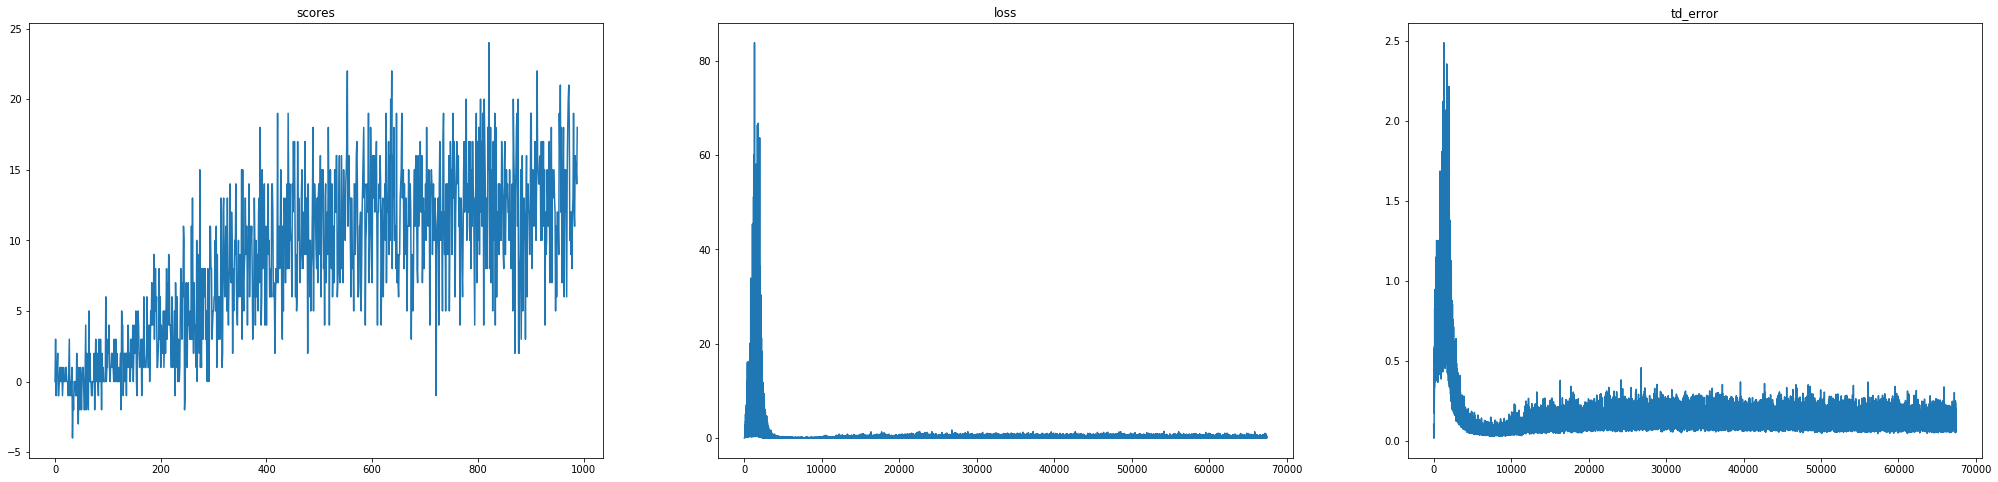

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

### Model 5

* Epx decay at TAU from 0.1 to 0.001
* Batch size = 64

In [3]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_5'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.1  # Soft update parameter for target_network
    TAU_DECAY = 0.001
    TAU_MIN = 0.05
    DECAY_TAU = True
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.csv'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 0.47
Episode 200	Average Score: 3.10
Episode 300	Average Score: 5.40
Episode 400	Average Score: 7.78
Episode 500	Average Score: 9.38
Episode 600	Average Score: 11.05
Episode 700	Average Score: 12.23
Episode 744	Average Score: 12.96
Environment solved in 745 episodes!	Average Score: 13.03


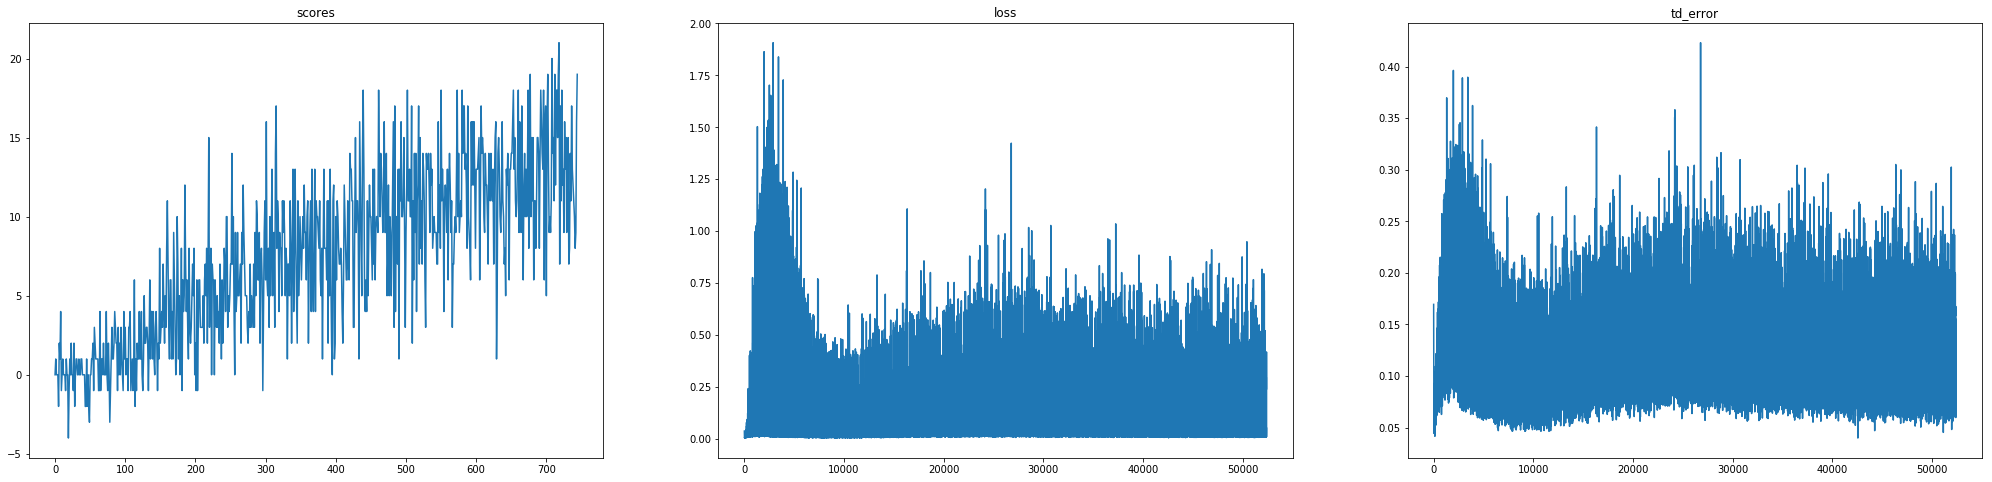

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

## Model 6:

* Making Hard Update:

In [4]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_6'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = False
    TAU = 0.1  # Soft update parameter for target_network
    TAU_DECAY = 0.001
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = True
    HARD_UPDATE_FREQUENCY = 500
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.csv'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 0.60
Episode 200	Average Score: 4.40
Episode 300	Average Score: 6.48
Episode 400	Average Score: 8.24
Episode 500	Average Score: 9.41
Episode 600	Average Score: 10.54
Episode 700	Average Score: 11.16
Episode 800	Average Score: 12.40
Episode 853	Average Score: 12.94
Environment solved in 854 episodes!	Average Score: 13.01


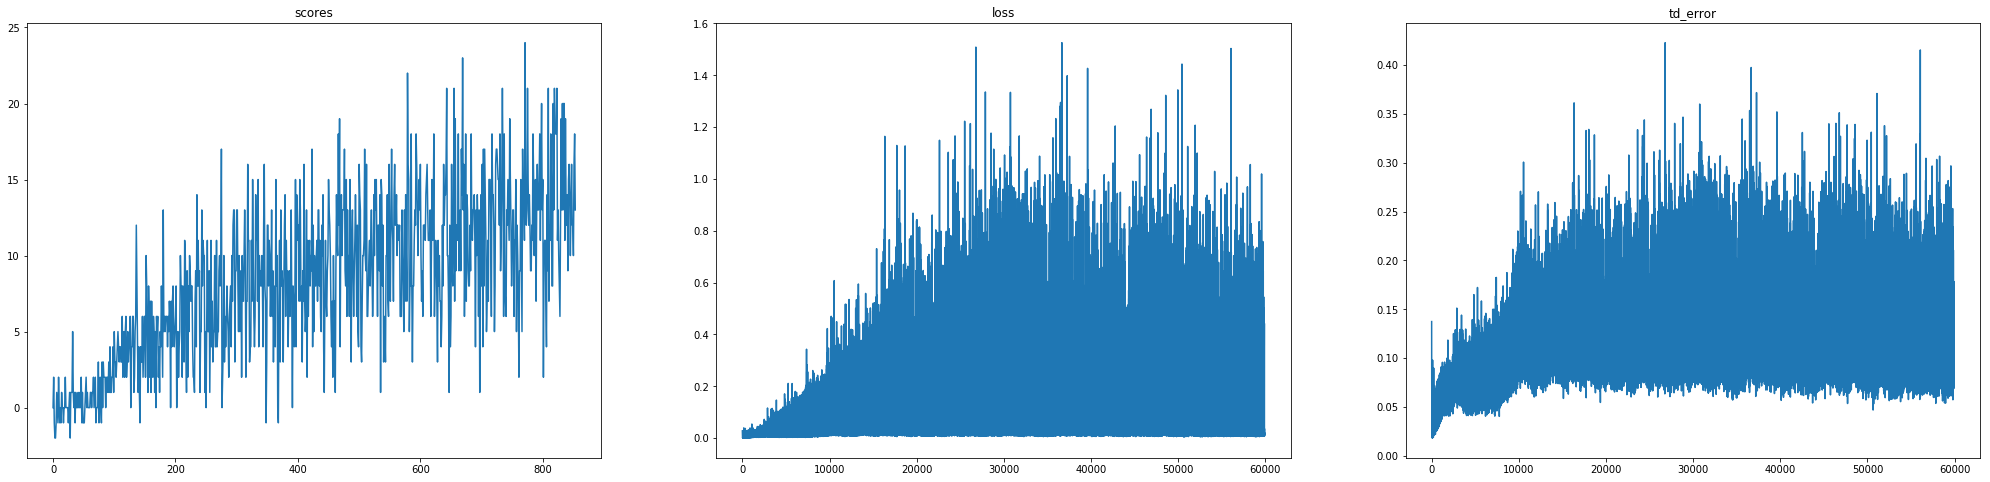

In [5]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

## Model 7:

* Making Hard Update: Frequency = 2000 timestep
    

In [3]:
from main import CollectBanana, DDQN
import numpy as np

class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_7'
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = False
    TAU = 0.1  # Soft update parameter for target_network
    TAU_DECAY = 0.001
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = True
    HARD_UPDATE_FREQUENCY = 2000
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
   # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.csv'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 1.06
Episode 200	Average Score: 4.50
Episode 300	Average Score: 8.53
Episode 400	Average Score: 9.69
Episode 500	Average Score: 11.87
Episode 600	Average Score: 11.88
Episode 700	Average Score: 11.81


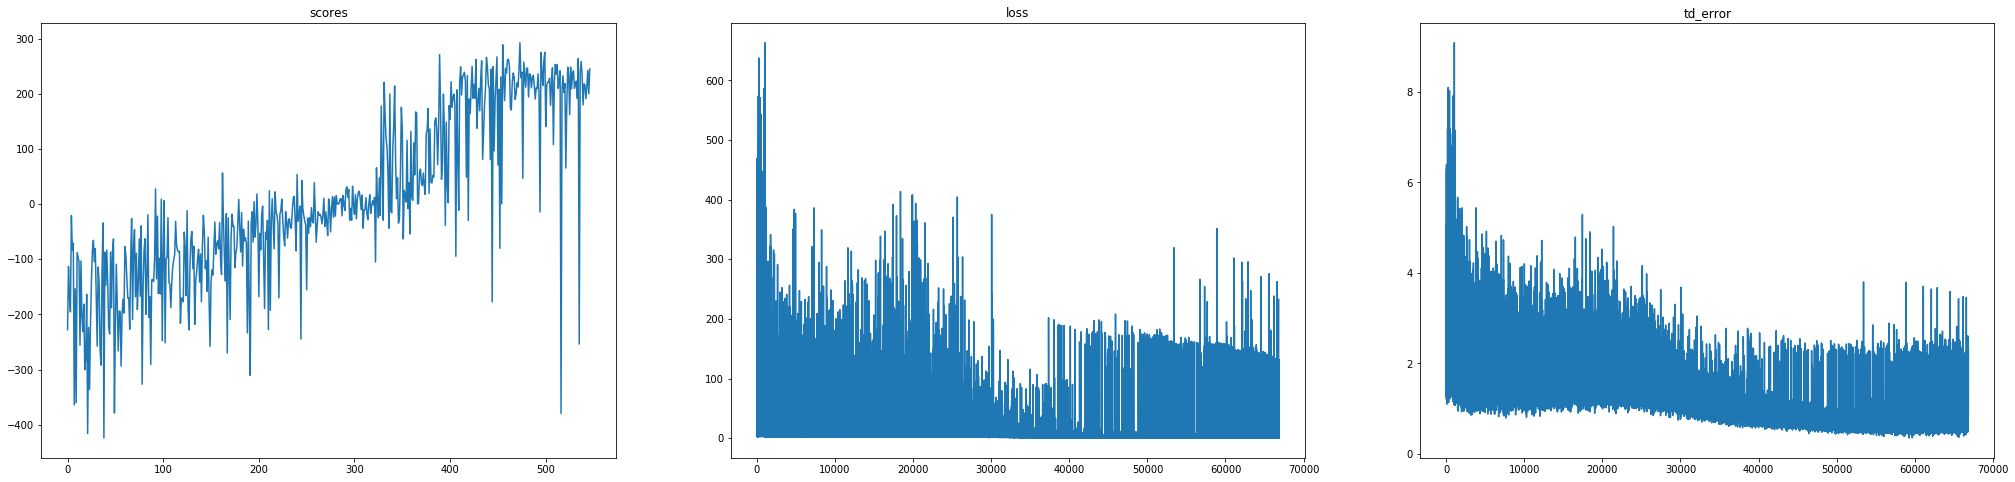

In [5]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

## Model 8:

* Making Hard Update: Frequency 100

In [3]:
from main import CollectBanana, DDQN
import numpy as np

class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_8'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = False
    TAU = 0.1  # Soft update parameter for target_network
    TAU_DECAY = 0.001
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = True
    HARD_UPDATE_FREQUENCY = 100
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.csv'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
                
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 0.57
Episode 200	Average Score: 2.00
Episode 300	Average Score: 4.96
Episode 400	Average Score: 7.34
Episode 500	Average Score: 8.84
Episode 600	Average Score: 10.76
Episode 700	Average Score: 12.30
Episode 753	Average Score: 12.89
Environment solved in 754 episodes!	Average Score: 13.08


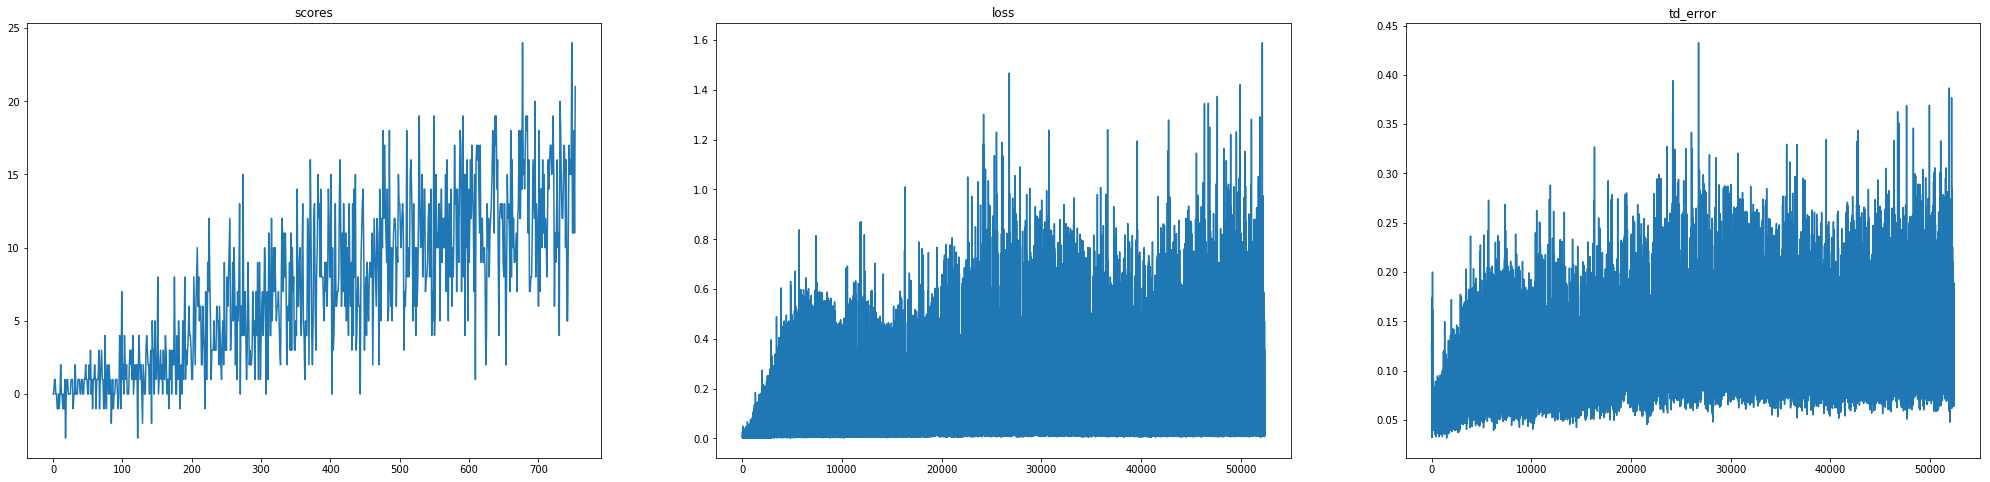

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

## Model 9: 

* Making Hard Update: Frequency = 500
* Using Double DQN

In [3]:
from main import CollectBanana, DDQN
import numpy as np

class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_9'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 1000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = False
    TAU = 0.001  # Soft update parameter for target_network
    TAU_DECAY = 0.001
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = True
    HARD_UPDATE_FREQUENCY = 500
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'ddqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.csv'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
        
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 1.05
Episode 200	Average Score: 3.94
Episode 300	Average Score: 7.66
Episode 400	Average Score: 9.06
Episode 500	Average Score: 9.70
Episode 600	Average Score: 12.11
Episode 629	Average Score: 12.97
Environment solved in 630 episodes!	Average Score: 13.00


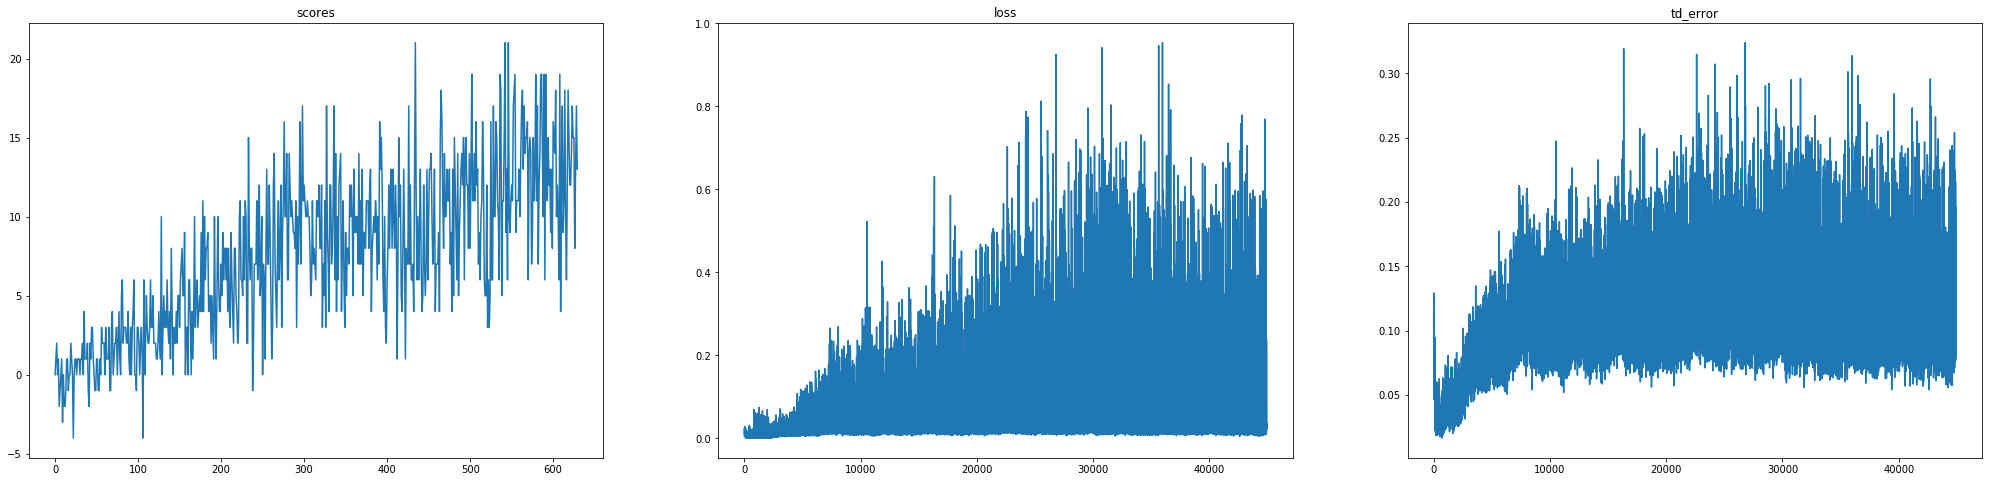

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

## Model 10: 

* Making Soft Update: TAU = 0.001
* Using Double DQN

In [3]:
from main import CollectBanana, DDQN
import numpy as np


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_10'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'ddqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
    
env = CollectBanana()
dqn = DDQN(Config, env)
scores = dqn.train()

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Episode 100	Average Score: 0.40
Episode 200	Average Score: 3.75
Episode 300	Average Score: 7.19
Episode 400	Average Score: 11.06
Episode 500	Average Score: 12.69
Episode 514	Average Score: 12.99
Environment solved in 515 episodes!	Average Score: 13.02


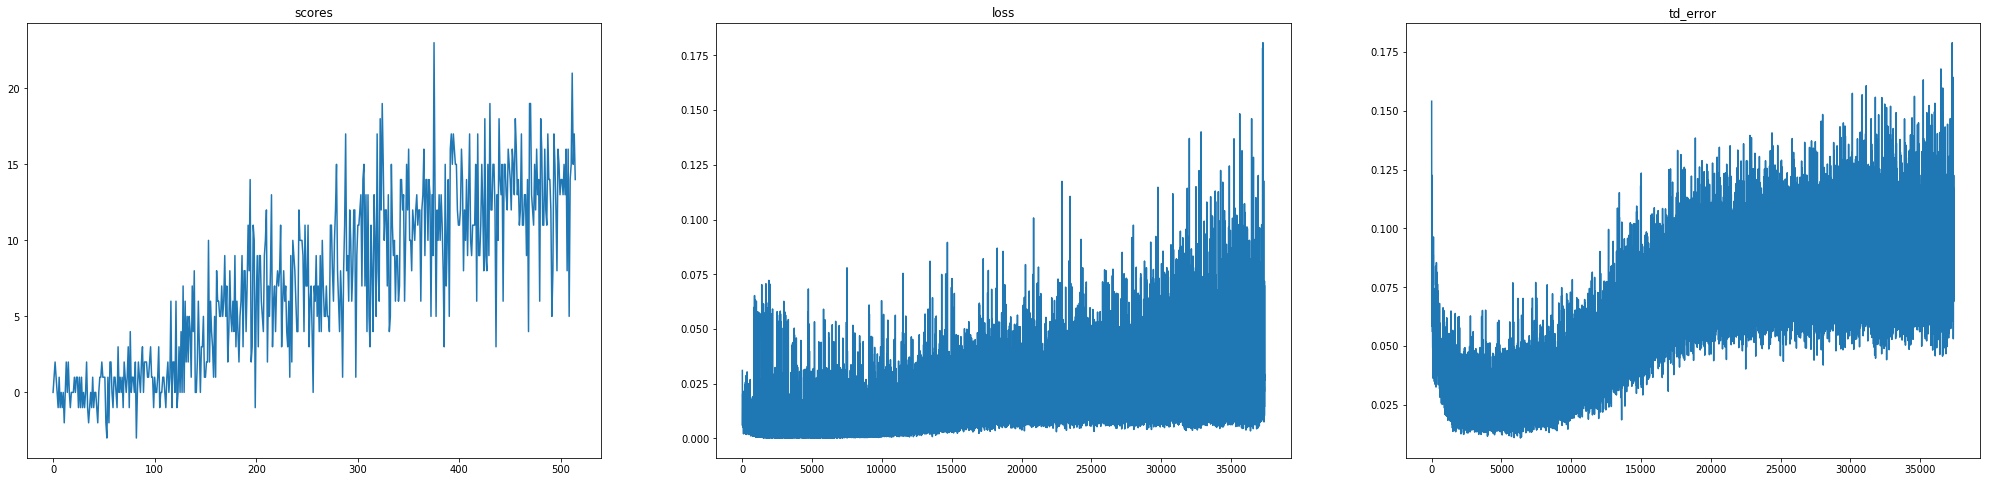

In [4]:
stats_dict = cmn.read_json(Config.STATS_JSON_PATH)
plot(scores, stats_dict['loss'], stats_dict['td_error'])

## TEST THE BEST MODEL:
-------

In [4]:
import os
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/sam/All-Program/App/deep-reinforcement-learning/')

from DeepRL.src import commons as cmn
from main import CollectBanana, DDQN

%matplotlib inline

In [2]:
# IT seems model 1 was the best with best average score at 488 episodes.
# args = None
# model_path = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/model_1.pth'


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_1'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
        
        
        
env = CollectBanana(mode='test')
dqn = DDQN(Config, env)
scores = dqn.test(trials=3, steps=2000)

Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Start Trial...
Current Reward: 1.0 Total Reward: 1.0
Current Reward: 1.0 Total Reward: 2.0
Current Reward: 1.0 Total Reward: 3.0
Current Reward: 1.0 Total Reward: 4.0
Current Reward: 1.0 Total Reward: 5.0
Current Reward: 1.0 Total Reward: 6.0
Current Reward: 1.0 Total Reward: 7.0
Current Reward: 1.0 Total Reward: 8.0
Done.
Start Trial...
Current Reward: 1.0 Total Reward: 1.0
Current Reward: 1.0 Total Reward: 2.0
Current Reward: 1.0 Total Reward: 3.0
Current Reward: 1.0 Total Reward: 4.0
Current Reward: 1.0 Total Reward: 5.0
Current Reward: 1.0 Total Reward: 6.0
Current Reward: 1.0 Total Reward: 7.0
Current Reward: 1.0 Total Reward: 8.0
Current Reward: 1.0 Total Reward: 9.0
Current Reward: 1.0 Total Reward: 10.0
Current Reward: 1.0 Total Reward: 11.0
Done.
Start Trial...
Current Reward: 1.0 Total R

In [5]:
# IT seems model 1 was the best with best average score at 488 episodes.
# args = None
# model_path = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/model_1.pth'


class Config:
    print('Reading Config File ............')
    MODEL_NAME = 'model_10'
    
    # ENVIRONMEMT PARAMETER
    STATE_SIZE = 37
    ACTION_SIZE = 4
    NUM_EPISODES = 2000
    NUM_TIMESTEPS = 1000
    
    # MODEL PARAMETERS
    SEED = 0
    BUFFER_SIZE = int(1e05)
    BATCH_SIZE = 64
    UPDATE_AFTER_STEP = 4
    
    # RL LEARNING PARAMETERS
    SOFT_UPDATE = True
    TAU = 0.001  # Soft update parameter for target_network
    TAU_DECAY = 0.003
    TAU_MIN = 0.05
    DECAY_TAU = False
    
    HARD_UPDATE = False
    HARD_UPDATE_FREQUENCY = 30
    
    GAMMA = 0.99  # Discount value
    EPSILON = 1  # Epsilon value for action selection
    EPSILON_DECAY = 0.995  # Epsilon decay for epsilon greedy policy
    EPSILON_MIN = 0.01  # Minimum epsilon to reach
    
    # ML LEARNING PARAMETERS
    LEARNING_RATE = 0.0005  # Learning rate for the network
    LEARNING_RATE_DECAY = None
    
    Q_LEARNING_TYPE = 'dqn' # dqn also available, ddqn is double dqn
    NET_NAME = 'net1'
    
    # PATHS
    STATS_JSON_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/stats/%s_stats.json'%str(MODEL_NAME)
    CHECKPOINT_PATH = '/Users/sam/All-Program/App-DataSet/DeepRL/collect_banana/checkpoints/%s.pth'%str(MODEL_NAME)
    
    if DECAY_TAU and TAU <= TAU_MIN:
        raise ValueError("TAU should have larger value that TAU_MIN")
        
    if EPSILON <= EPSILON_MIN:
        raise ValueError("EPSILON should have larger value that EPSILON_MIN")
    
    if SOFT_UPDATE and HARD_UPDATE:
        raise ValueError('Only one of soft_update and hard_update can be active')
        
        
        
env = CollectBanana(mode='test')
dqn = DDQN(Config, env)
scores = dqn.test(trials=3, steps=2000)


Reading Config File ............


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


[INIT] Initializing Replay Buffer .... .... ....
[INIT] Initializing RLAgent .... .... ....
[INIT] Initializing Network (net1) .... .... ....
[INIT] Initializing Network (net1) .... .... ....
Start Trial...
Done.
Start Trial...
Current Reward: 1.0 Total Reward: 1.0
Current Reward: 1.0 Total Reward: 2.0
Current Reward: 1.0 Total Reward: 3.0
Current Reward: 1.0 Total Reward: 4.0
Current Reward: 1.0 Total Reward: 5.0
Current Reward: 1.0 Total Reward: 6.0
Current Reward: 1.0 Total Reward: 7.0
Current Reward: 1.0 Total Reward: 8.0
Current Reward: 1.0 Total Reward: 9.0
Current Reward: 1.0 Total Reward: 10.0
Current Reward: 1.0 Total Reward: 11.0
Current Reward: 1.0 Total Reward: 12.0
Current Reward: 1.0 Total Reward: 13.0
Current Reward: 1.0 Total Reward: 14.0
Current Reward: 1.0 Total Reward: 15.0
Current Reward: 1.0 Total Reward: 16.0
Current Reward: 1.0 Total Reward: 17.0
Current Reward: 1.0 Total Reward: 18.0
Current Reward: 1.0 Total Reward: 19.0
Done.
Start Trial...
Current Reward: -1.

## ROUGH
------

In [2]:
from torchviz import make_dot

In [3]:
import torch
from model import QNetwork
# input_size = (1,3,4,84,84)
DQN=QNetwork(state_size=37, action_size=4, seed=0, network_name='net1')
x = torch.rand(size=(1, 37))
y = DQN(x)
params = dict(DQN.named_parameters())

[INIT] Initializing Network (net1) .... .... ....


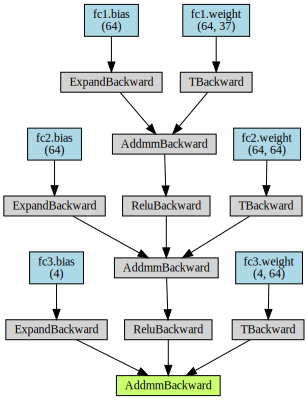

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

make_dot(y, params = params)